#### Hierarchical Clustering
It is of 2 types
1) Divisive Clustering<br>
2) Agglomerative Clustering


### Divisive Clustering:
The divisive clustering algorithm is a top-down clustering approach, initially, all the points in the dataset belong to one cluster and split is performed recursively as one moves down the hierarchy.

### Agglomerative Clustering
1) Agglomerative Clustering is a type of hierarchical clustering algorithm. It is an unsupervised machine learning technique that divides the population into several clusters such that data points in the same cluster are more similar and data points in different clusters are dissimilar.<br>
a) Points in the same cluster are closer to each other.<br>
b) Points in the different clusters are far apart.

2) Agglomerative Clustering is a bottom-up approach, initially, each data point is a cluster of its own, further pairs of clusters are merged as one moves up the hierarchy.

#### Steps of Agglomerative Clustering:

1) Initially, all the data-points are a cluster of its own.<br>
2) Take two nearest clusters and join them to form one single cluster.<br>
3) Proceed recursively step 2 until you obtain the desired number of clusters.

#### How to join two clusters to form one cluster

To obtain the desired number of clusters, the number of clusters needs to be reduced from initially being n cluster (n equals the total number of data-points). 
Two clusters are combined by computing the similarity between them.

There are some methods which are used to calculate the similarity between two clusters:

a) Distance between two closest points in two clusters.<br>
b) Distance between two farthest points in two clusters.<br>
c) The average distance between all points in the two clusters.<br>
d) Distance between centroids of two clusters.<br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame({'f1':[7,10,20,28,35]})
df

,f1
0,7
1,10
2,20
3,28
4,35


### Single Linkage
Clusters are formed considering minimum distance

In [5]:
from scipy.cluster.hierarchy import linkage,dendrogram

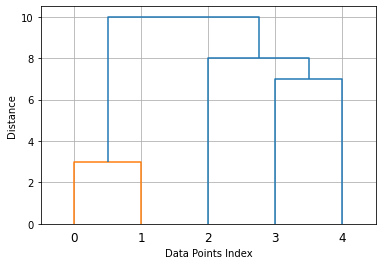

In [9]:
dendrogram(linkage(df,method='single',metric='euclidean'))
plt.xlabel('Data Points Index')
plt.ylabel('Distance')
plt.grid()
plt.show()
# 0-7, 1-10, 2-20 , 3-28, 4-35

### PM- Proximity Matrix

<img src="Agg_Cluster_img11_Single_Complete Linkage.png">

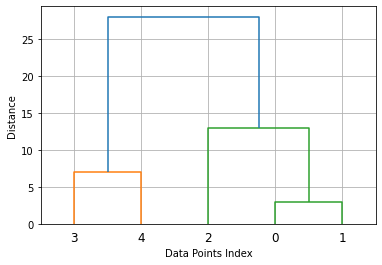

In [11]:
dendrogram(linkage(df,method='complete',metric='euclidean'))
plt.xlabel('Data Points Index')
plt.ylabel('Distance')
plt.grid()
plt.show()
# 0-7, 1-10, 2-20 , 3-28, 4-35

### Average Linkage
Clusters are formed considering average distance

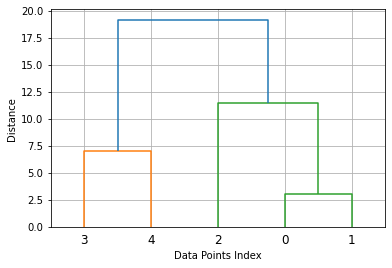

In [12]:
dendrogram(linkage(df,method='average',metric='euclidean'))
plt.xlabel('Data Points Index')
plt.ylabel('Distance')
plt.grid()
plt.show()

### Ward Linkage

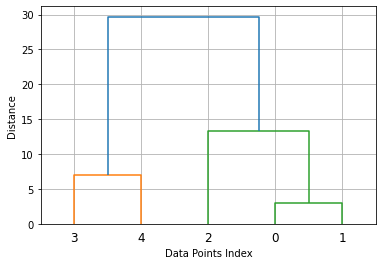

In [36]:
dendrogram(linkage(df,method='ward',metric='euclidean'))
plt.xlabel('Data Points Index')
plt.ylabel('Distance')
plt.grid()
plt.show()

#### Example - 2

In [14]:
d = {'f1':[5,10,15,24,30,85,71,60,70,80],
    'f2':[3,15,12,10,30,70,80,78,55,91]
    }
df1 = pd.DataFrame(d)
df1

,f1,f2
0,5,3
1,10,15
2,15,12
3,24,10
4,30,30
5,85,70
6,71,80
7,60,78
8,70,55
9,80,91


In [15]:
df1.shape

(10, 2)

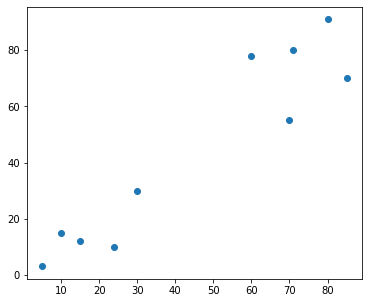

In [21]:
labels= range(0,10)
plt.figure(figsize=(6,5))
plt.scatter(df1['f1'],df1['f2'])
plt.show()

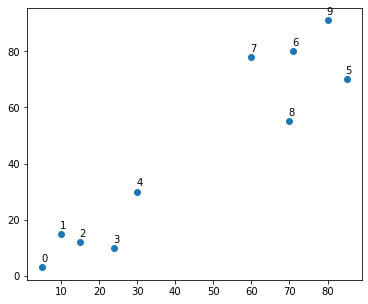

In [24]:
labels= range(0,10)
plt.figure(figsize=(6,5))
plt.scatter(df1['f1'],df1['f2'])

for label, x, y in zip(labels,df1['f1'],df1['f2']):
    plt.annotate(text=label,xy=(x-0.3,y+2))
plt.show()

### Single Linkage

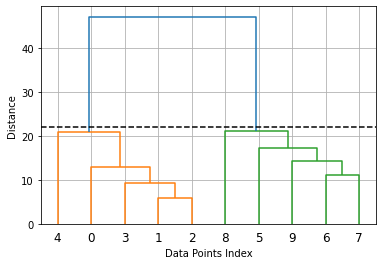

In [39]:
dendrogram(linkage(df1,method='single',metric='euclidean'))
plt.xlabel('Data Points Index')
plt.ylabel('Distance')
plt.grid()
plt.axhline(y=22,color='black',linestyle='--')
plt.show()

### Different Linkages

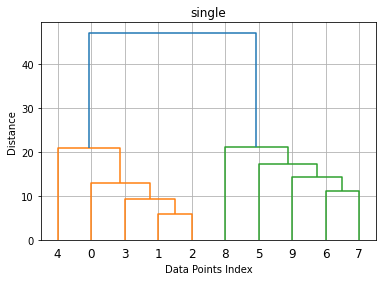

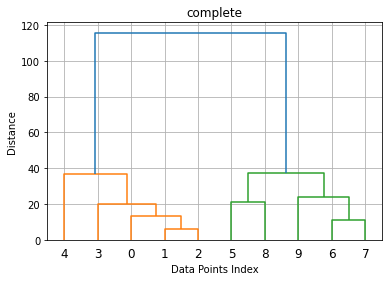

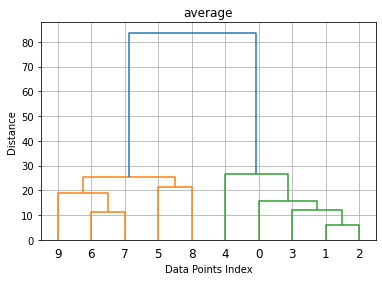

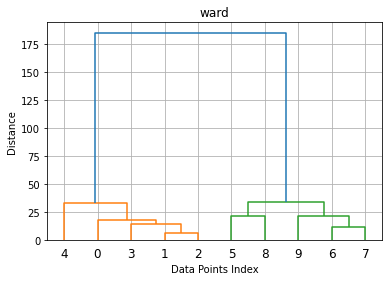

In [33]:
link_methods=['single','complete','average','ward']
for i in link_methods:
    dendrogram(linkage(df1,method=i,metric='euclidean'))
    plt.xlabel('Data Points Index')
    plt.ylabel('Distance')
    plt.title(i)
    plt.grid()
    plt.show()

### Agglomerative Clustering

In [41]:
from sklearn.cluster import AgglomerativeClustering as AC

In [42]:
m1=AC(n_clusters=2,affinity='euclidean',linkage='complete')
ypred_m1=m1.fit_predict(df1)
print(ypred_m1)

[1 1 1 1 1 0 0 0 0 0]


In [44]:
print(m1.labels_)

[1 1 1 1 1 0 0 0 0 0]


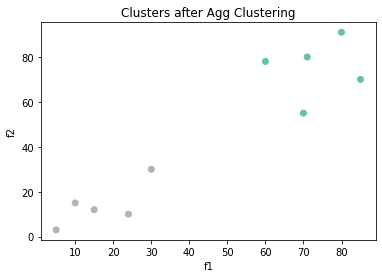

In [52]:
plt.scatter(df1['f1'],df1['f2'],c=ypred_m1,cmap='Set2')
plt.title('Clusters after Agg Clustering')
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()